<a href="https://colab.research.google.com/github/NehaTadavi/FODIP-Lab-Assignments/blob/main/Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def quantize_channel(channel, levels):
    div = 256 // levels
    return (channel // div) * div

In [ ]:
img = cv2.imread("/content/images.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv)

h_q = quantize_channel(h, 12)
s_q = quantize_channel(s, 4)
v_q = quantize_channel(v, 4)

hsv_q = cv2.merge([h_q, s_q, v_q])
hsv_q_rgb = cv2.cvtColor(hsv_q, cv2.COLOR_HSV2RGB)

In [ ]:
ycbcr = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
y, cb, cr = cv2.split(ycbcr)

y_q = quantize_channel(y, 16)
cb_q = quantize_channel(cb, 8)
cr_q = quantize_channel(cr, 8)

ycbcr_q = cv2.merge([y_q, cb_q, cr_q])
ycbcr_q_rgb = cv2.cvtColor(ycbcr_q, cv2.COLOR_YCrCb2RGB)

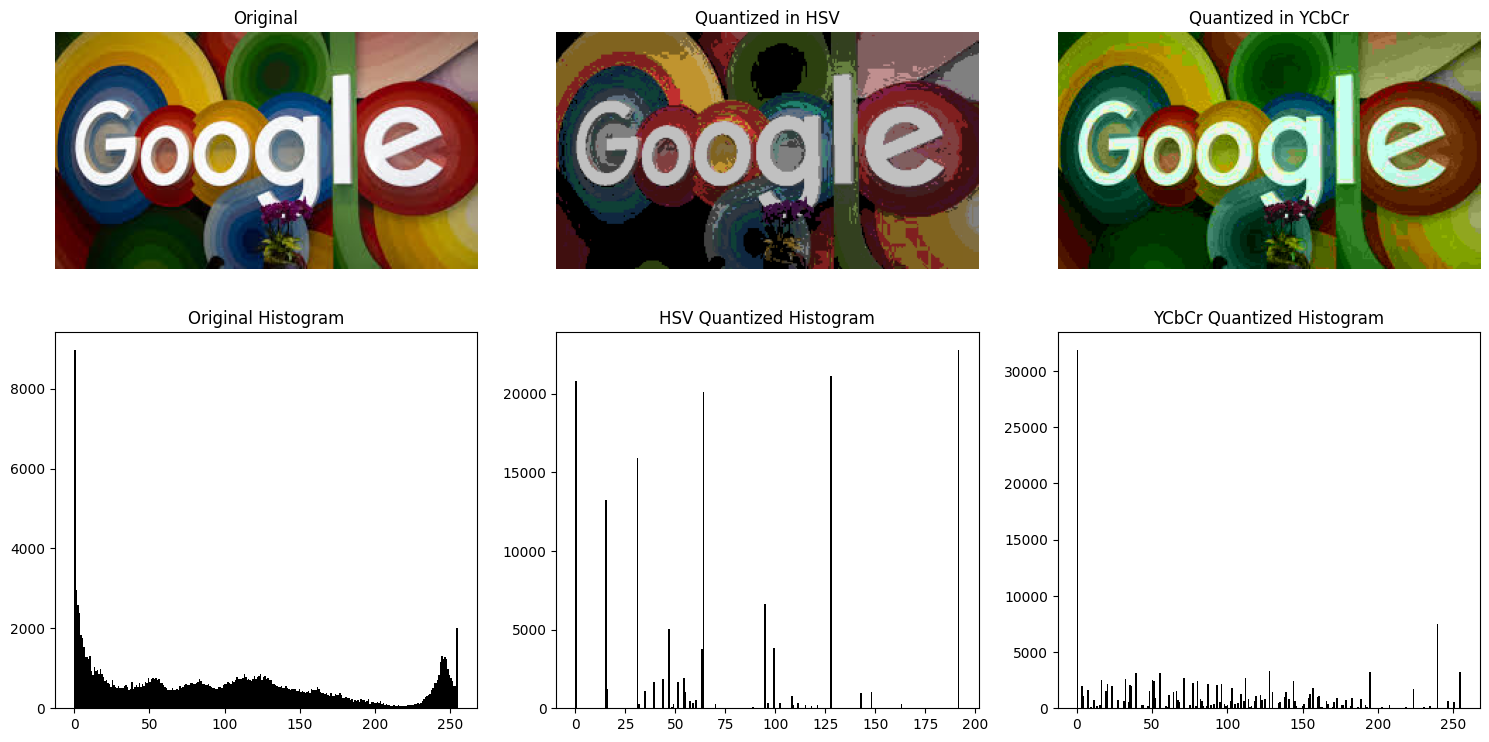

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(15,8))

axs[0,0].imshow(img)
axs[0,0].set_title("Original")
axs[0,0].axis("off")

axs[0,1].imshow(hsv_q_rgb)
axs[0,1].set_title("Quantized in HSV")
axs[0,1].axis("off")

axs[0,2].imshow(ycbcr_q_rgb)
axs[0,2].set_title("Quantized in YCbCr")
axs[0,2].axis("off")

axs[1,0].hist(img.ravel(), bins=256, color='black')
axs[1,0].set_title("Original Histogram")

axs[1,1].hist(hsv_q_rgb.ravel(), bins=256, color='black')
axs[1,1].set_title("HSV Quantized Histogram")

axs[1,2].hist(ycbcr_q_rgb.ravel(), bins=256, color='black')
axs[1,2].set_title("YCbCr Quantized Histogram")

plt.tight_layout()
plt.show()